![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


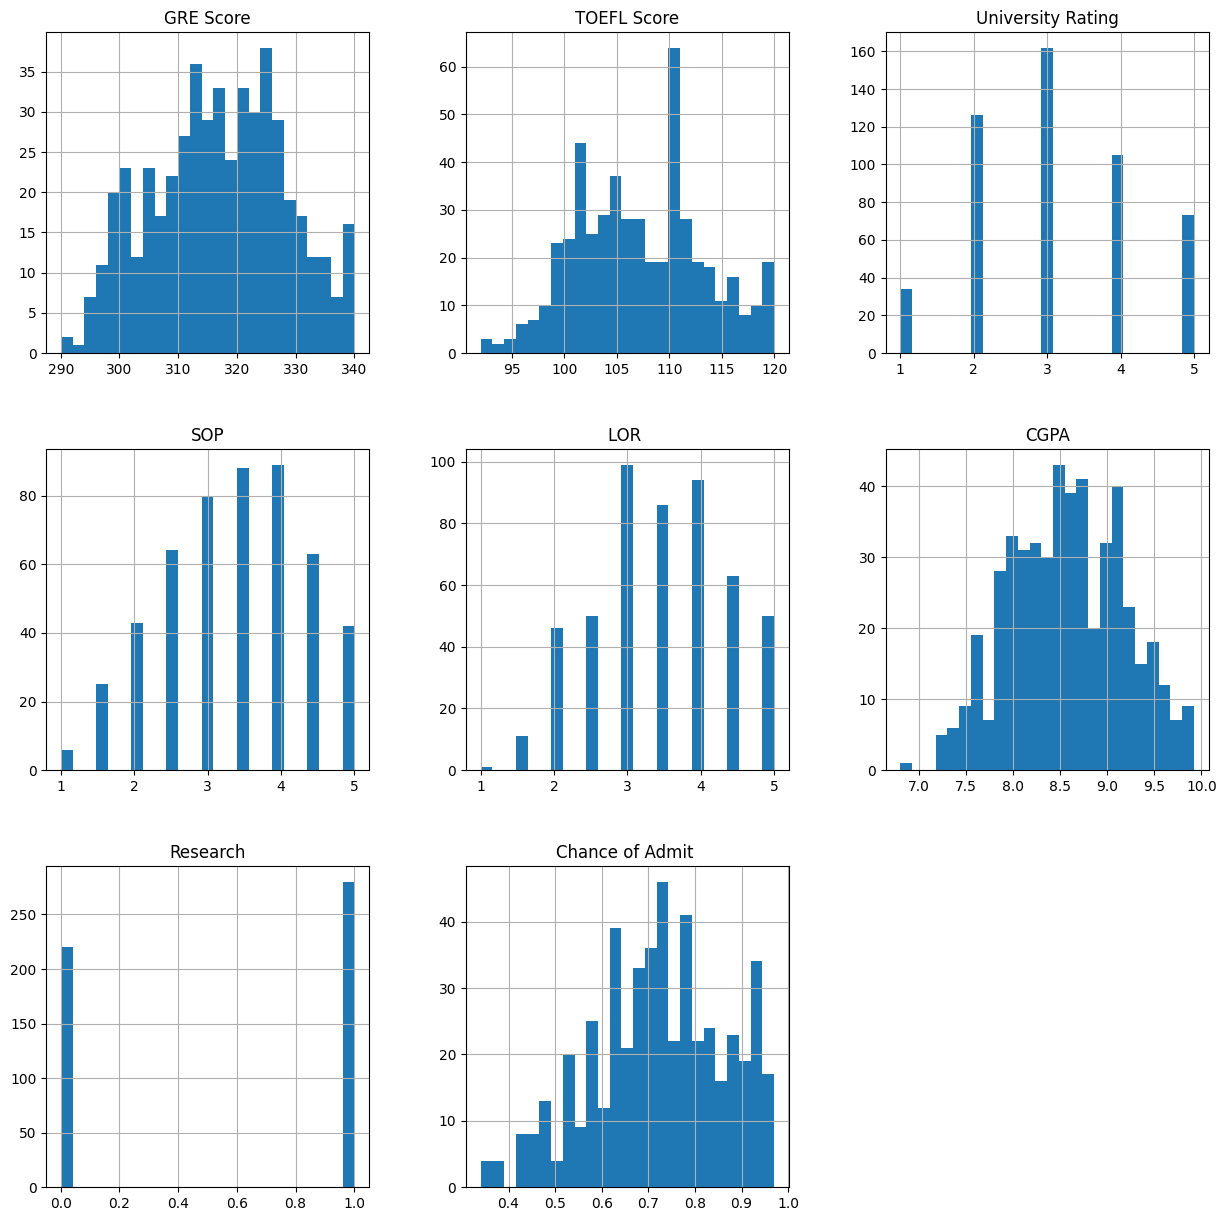

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
# Se importan las librerías adicionales necesarias para el desarrollo del taller.
import os
import random
import tensorflow as tf

from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping



# Para evitar la aleatoridad en los resultados de las Redes Neuronales en diferentes ejecuciones, se fijan las semillas durante la ejecución.
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# Inicialmente se realiza la estandarización de las variables predictoras, de entrenamiento y evaluación.
scaler = StandardScaler()
xTrain_Scaled = scaler.fit_transform(xTrain)
xTest_Scaled = scaler.transform(xTest)

# Se definen las dimensiones de entrada y salida del modelo a partir de las variables predictoras y la variable de respuesta.
inputShape = xTrain.shape[1]
outputShape = 1



# Se define la arquitectura de la Red Neuronal de una capa. Se utiliza la función de activación 'sigmoid', dado que se están prediciendo probabilidades, cuyos valores están entre 0 y 1.
K.clear_session()
neuralNetwork_1 = Sequential()
neuralNetwork_1.add(Dense(units = outputShape, input_shape = (inputShape, ), activation = 'sigmoid'))

# Se imprime la estructura de la Red Neuronal.
layerIndex = 1
print('-' * 50)
print('Estructura de la Red Neuronal'.center(50))
print('-' * 50, '\n')
for layer in neuralNetwork_1.layers:
    if layerIndex > 1:
        print('\n')
    print(f'Capa {layerIndex}:')
    print(f'   Tipo de Capa: {layer.name}')
    print(f'   Número Total de Parámetros: {layer.count_params()}')
    print(f'      Número de Pesos: {layer.get_weights()[0].size}')
    print(f'      Número de Sesgos: {layer.get_weights()[1].size}')
    layerIndex = layerIndex + 1


--------------------------------------------------
          Estructura de la Red Neuronal           
-------------------------------------------------- 

Capa 1:
   Tipo de Capa: dense
   Número Total de Parámetros: 8
      Número de Pesos: 7
      Número de Sesgos: 1


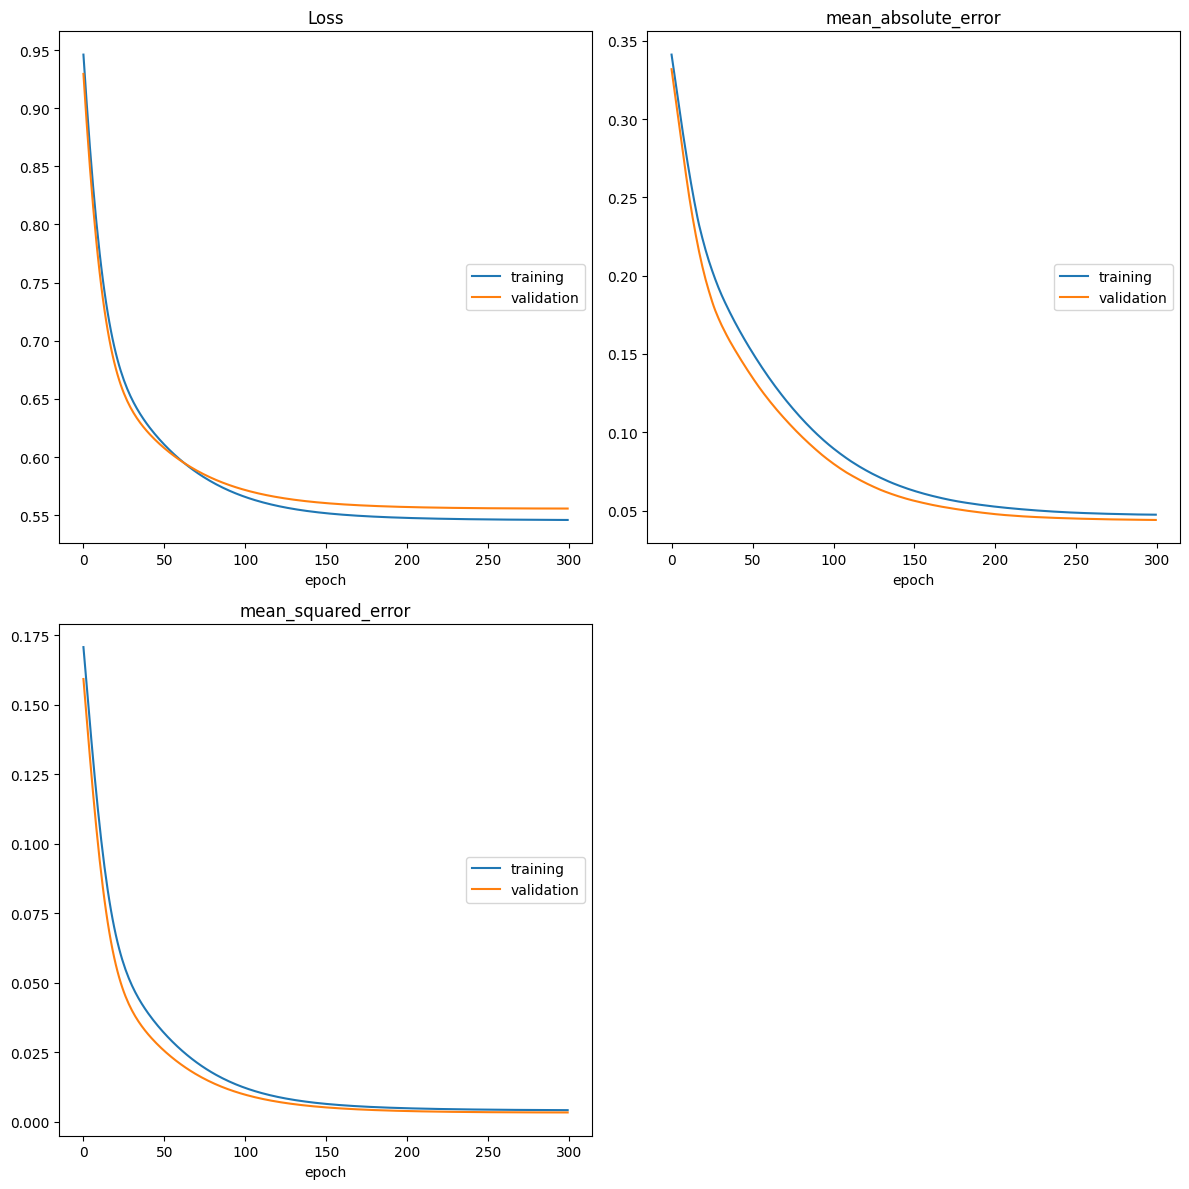

Loss
	training         	 (min:    0.546, max:    0.946, cur:    0.546)
	validation       	 (min:    0.556, max:    0.929, cur:    0.556)
mean_absolute_error
	training         	 (min:    0.047, max:    0.341, cur:    0.047)
	validation       	 (min:    0.044, max:    0.332, cur:    0.044)
mean_squared_error
	training         	 (min:    0.004, max:    0.171, cur:    0.004)
	validation       	 (min:    0.003, max:    0.159, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5523 - mean_absolute_error: 0.0514 - mean_squared_error: 0.0050 - val_loss: 0.5557 - val_mean_absolute_error: 0.0440 - val_mean_squared_error: 0.0034


In [10]:
# Se define la función de pérdida 'binary_crossentropy', y se realiza el entrenamiento del modelo.
neuralNetwork_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mean_squared_error', 'mean_absolute_error'])
neuralNetwork_1.fit(xTrain_Scaled, yTrain, epochs = 300, validation_data = (xTest_Scaled, yTest), callbacks = [PlotLossesKeras()])

## Procedimiento

---

0. Se importan las librerías adicionales necesarias para el modelamiento de las Redes Neuronales. De igual manera, **se establece un valor fijo como semilla de aleatoriedad para asegurar la consistencia de los resultados en diferentes ejecuciones del modelo**.

1. Se realiza la estandarización de las variables predictoras tanto de entrenamiento (`xTrain`) como de prueba (`xTest`).

2. Se obtienen las dimensiones de entrada, que **representan el número de variables predictoras** (`inputShape`), y las dimensiones de salida, que **representan el número de variables a predecir** (`outputShape`).

3. Se construye una **Red Neuronal de una sola capa** con los parámetros `Dense(units = 1, input_shape = 7, activation = 'sigmoid')`.

4. Se imprime el resumen de la arquitectura del modelo, incluyendo el tipo de capa, así como la cantidad de parámetros (pesos y sesgos).

5. Se compila el modelo con los siguientes parámetros:
   - Optimizador: `adam`.
   - Función de pérdida: `binary_crossentropy`.
   - Métricas: `mean_squared_error` y `mean_absolute_error`.

6. **Se entrena el modelo a través de 300 iteraciones (épocas)** utilizando `xTrain_Scaled`. Se visualiza en tiempo real la función de pérdida, el MSE y el MAE del conjunto de validación `xTest_Scaled`.

## Análisis

---

1. Inicialmente, **se presenta una justificación respecto al optimizador, la función de pérdida y la función de activación** seleccionados durante el modelamiento de las Redes Neuronales durante el presente taller:

    - **Optimizador**<sup>[1]</sup> <sup>[2]</sup>. Luego de investigar un poco sobre los optimizadores comúnmente utilizados al ajustar Redes Neuronales, **se decidió implementar el optimizador Adaptive Moment Estimation (Adam)** debido a sus ventajas sobre Gradiente Descendente Estocástico (SGD).

    - SGD realiza una búsqueda básica sobre el espacio de soluciones. **Es un optimizador cuya tasa de aprendizaje es fija y sigue la dirección de mayor disminución del error.** Sin embargo, dependiendo de la elección de esta tasa, **este método puede quedar atrapado en óptimos locales y ser muy lento al encontrar los parámetros** (si la tasa es baja), o bien **saltar entre valores sub-óptimos sin encontrar la convergencia** (si la tasa es alta).

    - Por otro lado, **Adam ajusta individualmente la tasa de aprendizaje para cada parámetro** usando promedios móviles del gradiente y su magnitud. Esto permite acelerar la búsqueda de una pérdida mínima, especialmente en regiones planas o de alta variabilidad. Además, al no tener una tasa de aprendizaje fija sino adaptable, **Adam suele converger más rápido y con mejores resultados que SGD**. Esta diferencia se evidenció claramente durante el desarrollo del taller a través de diferentes pruebas, por lo cual **se decidió usar Adam como método de éstimación de parámetros**.

    - **Función de pérdida**. Al tratarse de un modelo que busca predecir probabilidades (valores entre 0 y 1), **usar *Entropía Cruzada Binaria* tiene la ventaja de penalizar mucho más fuerte las predicciones erróneas extremas**.

    Si se usara MSE, este trataría las probabilidades como valores continuos, lo cual no es del todo adecuado cuando lo que realmente **se desea es castigar las predicciones que estén muy lejos del valor real `Y`**, especialmente si el modelo predice con "confianza" algo incorrecto.

    A continuación se muestra un ejemplo para ilustrar el efecto de cada tipo de función de pérdida, considerando un valor real `y = 1`:

    | Predicción | MSE                           | Binary Crossentropy                |
    |------------|-------------------------------|------------------------------------|
    | 0.01       | (1 - 0.01)² = 0.9801           | -log(0.01) ≈ 4.60                  |
    | 0.0001     | (1 - 0.0001)² = 0.9998         | -log(0.0001) ≈ 9.21                |

    Como se puede observar, **para predicciones muy cercanas a 0 (cuando el valor de la clase real es 1), el valor del MSE tiende a estabilizarse alrededor de 1**. De hecho, la diferencia en el MSE entre las predicciones 0.01 y 0.0001 es mínima. Esto implica que **MSE no penaliza con tanta fuerza el empeoramiento de una predicción ya equivocada**. En cambio, la función de pérdida *Binary Crossentropy* sí refleja un aumento significativo, pasando de 4.60 a 9.21,** mostrando una penalización mucho más agresiva ante predicciones extramas e incorrectas**.

    - **Función de activación**. Se usa Sigmoide como función de activación en la capa de salida ya que **acota las predicciones entre 0 y 1, siendo adecuada para modelar predicciones de probabilidades**.

2. El modelo fue entrenado con un número elevado de iteraciones (épocas) con el fin de **observar su comportamiento en un rango amplio y evaluar la posibilidad de sobre-ajuste** (por ejemplo, si la función de pérdida del conjunto de validación comenzaba a aumentar con el tiempo). Sin embargo, fue posible notar en el gráfico que **la pérdida de entrenamiento converge relativamente rápido y que la curva de validación sigue una trayectoria muy similar desde las primeras épocas**, aunque con una ligera mejora marginal con el paso del tiempo.

3. Además de la función de pérdida (Entropía Cruzada Binaria), **se hizo seguimiento al MAE y al MSE, observando un comportamiento coherente con el proceso de aprendizaje del modelo**.

4. **Resultados finales**. Luego del entrenamiento, los **mejores resultados obtenidos sobre los datos de validación** fueron los siguientes:
    - Función de pérdida: **0.556**
    - Mean Absolute Error (MAE): **0.044**
    - Mean Squared Error (MSE): **0.003**

## Referencias

---

Particularmente para la elección del optimizador, las siguientes fuentes fueron de gran ayuda para entender el funcionamiento de Adam:

[1] [Who's Adam and What's He Optimizing? | Deep Dive into Optimizers for Machine Learning!](https://www.youtube.com/watch?v=MD2fYip6QsQ)

[2] [What is Adam Optimizer? – GeeksForGeeks](https://www.geeksforgeeks.org/adam-optimizer/)

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Se define la arquitectura de la Red Neuronal de una capa. Se utiliza la función de activación 'sigmoid' en la capa de salida, dado que se están prediciendo probabilidades, cuyos valores están entre 0 y 1.
K.clear_session()
neuralNetwork_2 = Sequential()
neuralNetwork_2.add(Dense(units = 256, input_shape = (inputShape, ), activation = 'relu'))
neuralNetwork_2.add(Dense(units = outputShape, activation = 'sigmoid'))

# Se imprime la estructura de la Red Neuronal.
layerIndex = 1
print('-' * 50)
print('Estructura de la Red Neuronal'.center(50))
print('-' * 50, '\n')
for layer in neuralNetwork_2.layers:
    if layerIndex > 1:
        print('\n')
    print(f'Capa {layerIndex}:')
    print(f'   Tipo de Capa: {layer.name}')
    print(f'   Número Total de Parámetros: {layer.count_params()}')
    print(f'      Número de Pesos: {layer.get_weights()[0].size}')
    print(f'      Número de Sesgos: {layer.get_weights()[1].size}')
    layerIndex = layerIndex + 1

--------------------------------------------------
          Estructura de la Red Neuronal           
-------------------------------------------------- 

Capa 1:
   Tipo de Capa: dense
   Número Total de Parámetros: 2048
      Número de Pesos: 1792
      Número de Sesgos: 256


Capa 2:
   Tipo de Capa: dense_1
   Número Total de Parámetros: 257
      Número de Pesos: 256
      Número de Sesgos: 1


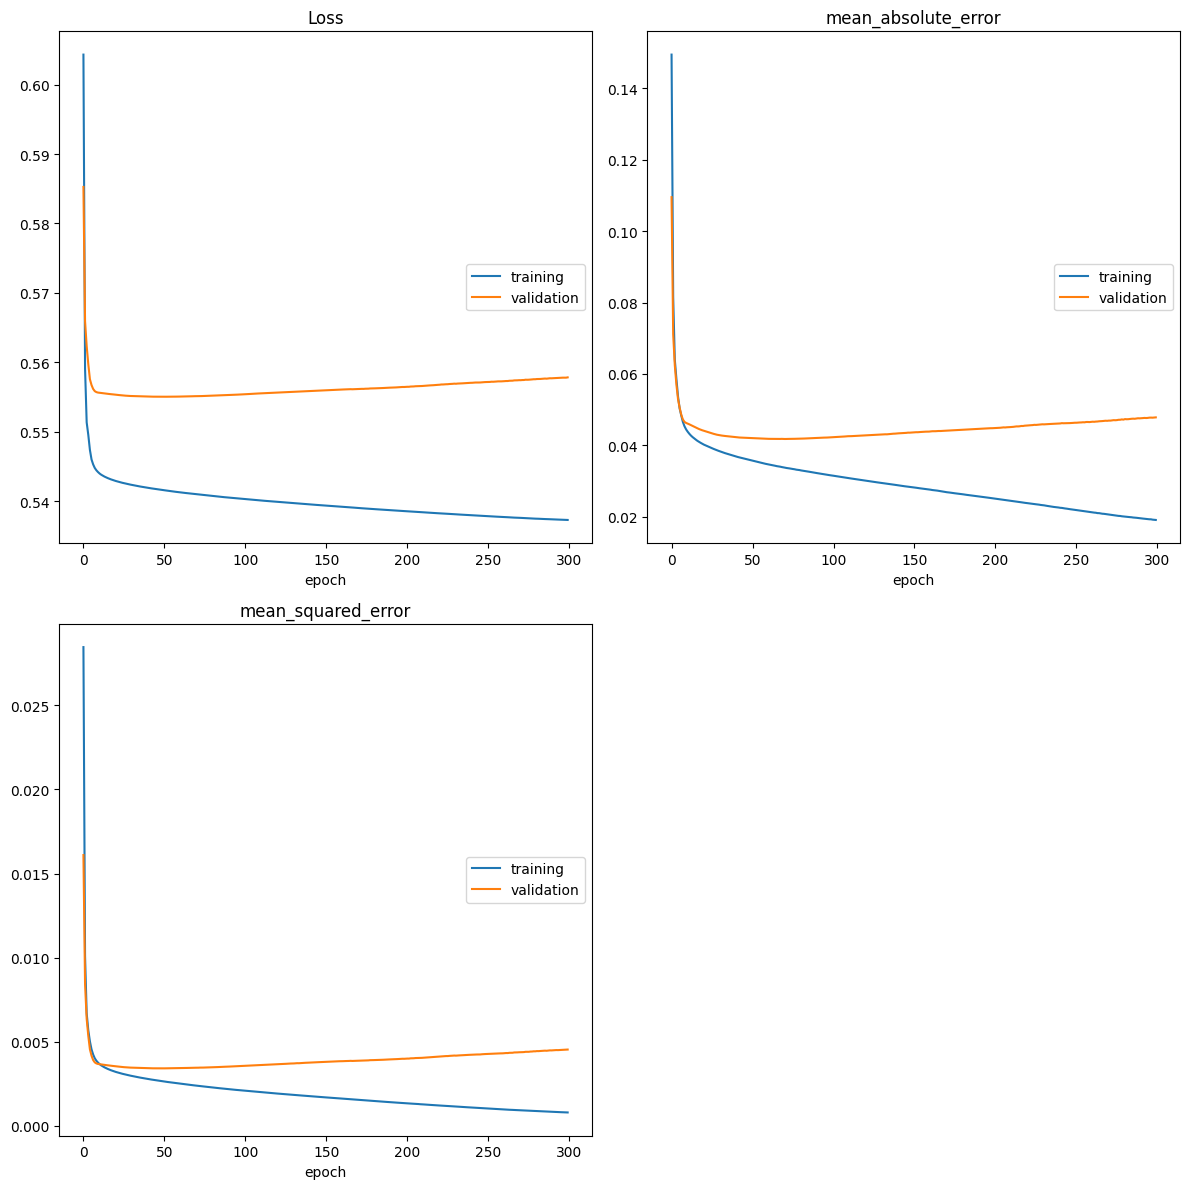

Loss
	training         	 (min:    0.537, max:    0.604, cur:    0.537)
	validation       	 (min:    0.555, max:    0.585, cur:    0.558)
mean_absolute_error
	training         	 (min:    0.019, max:    0.149, cur:    0.019)
	validation       	 (min:    0.042, max:    0.109, cur:    0.048)
mean_squared_error
	training         	 (min:    0.001, max:    0.028, cur:    0.001)
	validation       	 (min:    0.003, max:    0.016, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5417 - mean_absolute_error: 0.0193 - mean_squared_error: 8.0238e-04 - val_loss: 0.5578 - val_mean_absolute_error: 0.0478 - val_mean_squared_error: 0.0045


In [12]:
# Se define la función de pérdida 'binary_crossentropy', y se realiza el entrenamiento del modelo.
neuralNetwork_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mean_squared_error', 'mean_absolute_error'])
neuralNetwork_2.fit(xTrain_Scaled, yTrain, epochs = 300, validation_data = (xTest_Scaled, yTest), callbacks = [PlotLossesKeras()])

## Procedimiento

---

1. Se construye una **Red Neuronal de dos capas** con los parámetros:
   - **Capa 1**: `Dense(units = 256, input_shape = 7, activation = 'relu')`.
   - **Capa 2**: `Dense(units = 1, input_shape = 256, activation = 'sigmoid')`.

2. Se imprime el resumen de la arquitectura del modelo, incluyendo el tipo de capa, así como la cantidad de parámetros (pesos y sesgos).

3. Se compila el modelo con los siguientes parámetros:
   - Optimizador: `adam`.
   - Función de pérdida: `binary_crossentropy`.
   - Métricas: `mean_squared_error` y `mean_absolute_error`.

4. **Se entrena el modelo a través de 300 iteraciones (épocas)** utilizando `xTrain_Scaled`. Se visualiza en tiempo real la función de pérdida, el MSE y el MAE del conjunto de validación `xTest_Scaled`.

## Análisis

---

1. **Optimizador y función de pérdida**. Al igual que en el Punto 01, se utiliza como método de optimización **Adam** y como función de pérdida **Entropía Cruzada Binaria**. Su justificación completa se encuentra en el análisis del modelo anterior.
   - Se mantiene el uso de `binary_crossentropy` debido a su eficacia en problemas donde se estiman probabilidades entre 0 y 1.
   - Se opta nuevamente por el optimizador `adam` (Adaptive Moment Estimation) en lugar de `SGD`, por su rápida convergencia y capacidad para adaptarse a diversas funciones del error.

2. **Funciones de activación**. Se emplea **ReLU** como función de activación en la **capa oculta**, y **Sigmoide** en la **capa de salida**.
   - Tras diversas pruebas utilizando otras funciones como *Softmax* y *Sigmoide* en la capa oculta, **ReLU mostró un desempeño ligeramente superior** en términos de convergencia y precisión.
   - La función **Sigmoide** en la capa de salida se mantiene por su capacidad de acotar la salida al rango [0, 1], adecuado para representar probabilidades.

3. **Número de iteraciones (épocas)**. Al igual que en el modelo del Punto 01, **se opta por un número relativamente alto de épocas para realizar seguimiento al comportamiento del modelo y detectar posibles señales de sobre-ajuste**. Se observó una convergencia temprana en la función de pérdida tanto en los datos de entrenamiento como en los de validación, lo cual es un buen indicio de estabilidad.

4. Respecto al número de neuronas, se utilizaron 256 unidades, ya que se identificó que **valores mayores a este generaban un incremento significativo en el tiempo de entrenamiento, sin mejoras sustanciales en el desempeño del modelo**. Además, tras algunas pruebas exploratorias, este valor mostró una buena relación entre capacidad de predicción y tiempo de ejecución.

5. Además de la función de pérdida (Entropía Cruzada Binaria), **se hizo seguimiento al MAE y al MSE, observando un comportamiento coherente con el proceso de aprendizaje del modelo**.

6. Al observar las gráficas de la función de pérdida, MAE y MSE, se nota que al **agregar una capa adicional al modelo, las curvas de entrenamiento y validación comienzan a divergir ligeramente desde las primeras épocas**. Este comportamiento es esperable, ya que una mayor profundidad en la red puede aumentar su capacidad para aprender patrones más específicos del conjunto de entrenamiento, sin llegar a sobre-ajustar los datos de validación. La divergencia observada no es considerablemente alta, por lo tanto, **se concluye que el modelo no presenta sobre-ajuste con el número de épocas utilizado**.

7. **Resultados finales**. Luego del entrenamiento, los **mejores resultados obtenidos sobre los datos de validación** fueron los siguientes:
   - **Función de pérdida**: `0.555`
   - **Mean Absolute Error (MAE)**: `0.042`
   - **Mean Squared Error (MSE)**: `0.003`

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Se define la arquitectura de la Red Neuronal de una capa. Se utiliza la función de activación 'sigmoid' en la capa de salida, dado que se están prediciendo probabilidades, cuyos valores están entre 0 y 1.
# Dentro de cada capa oculta se 'apaga' un porcentaje de nodos para ervitar sobre-ajuste.
K.clear_session()
neuralNetwork_3 = Sequential()
neuralNetwork_3.add(Dense(units = 256, input_shape = (inputShape, ), activation = 'relu'))
neuralNetwork_3.add(Dropout(0.2))
neuralNetwork_3.add(Dense(units = 128, activation = 'relu'))
neuralNetwork_3.add(Dropout(0.1))
neuralNetwork_3.add(Dense(units = outputShape, activation = 'sigmoid'))

# Se imprime la estructura de la Red Neuronal.
layerIndex = 1
print('-' * 50)
print('Estructura de la Red Neuronal'.center(50))
print('-' * 50, '\n')
for layer in neuralNetwork_3.layers:
    if 'dropout' not in layer.name:
        if layerIndex > 1:
            print('\n')
        print(f'Capa {layerIndex}:')
        print(f'   Tipo de Capa: {layer.name}')
        print(f'   Número Total de Parámetros: {layer.count_params()}')
        print(f'      Número de Pesos: {layer.get_weights()[0].size}')
        print(f'      Número de Sesgos: {layer.get_weights()[1].size}')
        layerIndex = layerIndex + 1

--------------------------------------------------
          Estructura de la Red Neuronal           
-------------------------------------------------- 

Capa 1:
   Tipo de Capa: dense
   Número Total de Parámetros: 2048
      Número de Pesos: 1792
      Número de Sesgos: 256


Capa 2:
   Tipo de Capa: dense_1
   Número Total de Parámetros: 32896
      Número de Pesos: 32768
      Número de Sesgos: 128


Capa 3:
   Tipo de Capa: dense_2
   Número Total de Parámetros: 129
      Número de Pesos: 128
      Número de Sesgos: 1


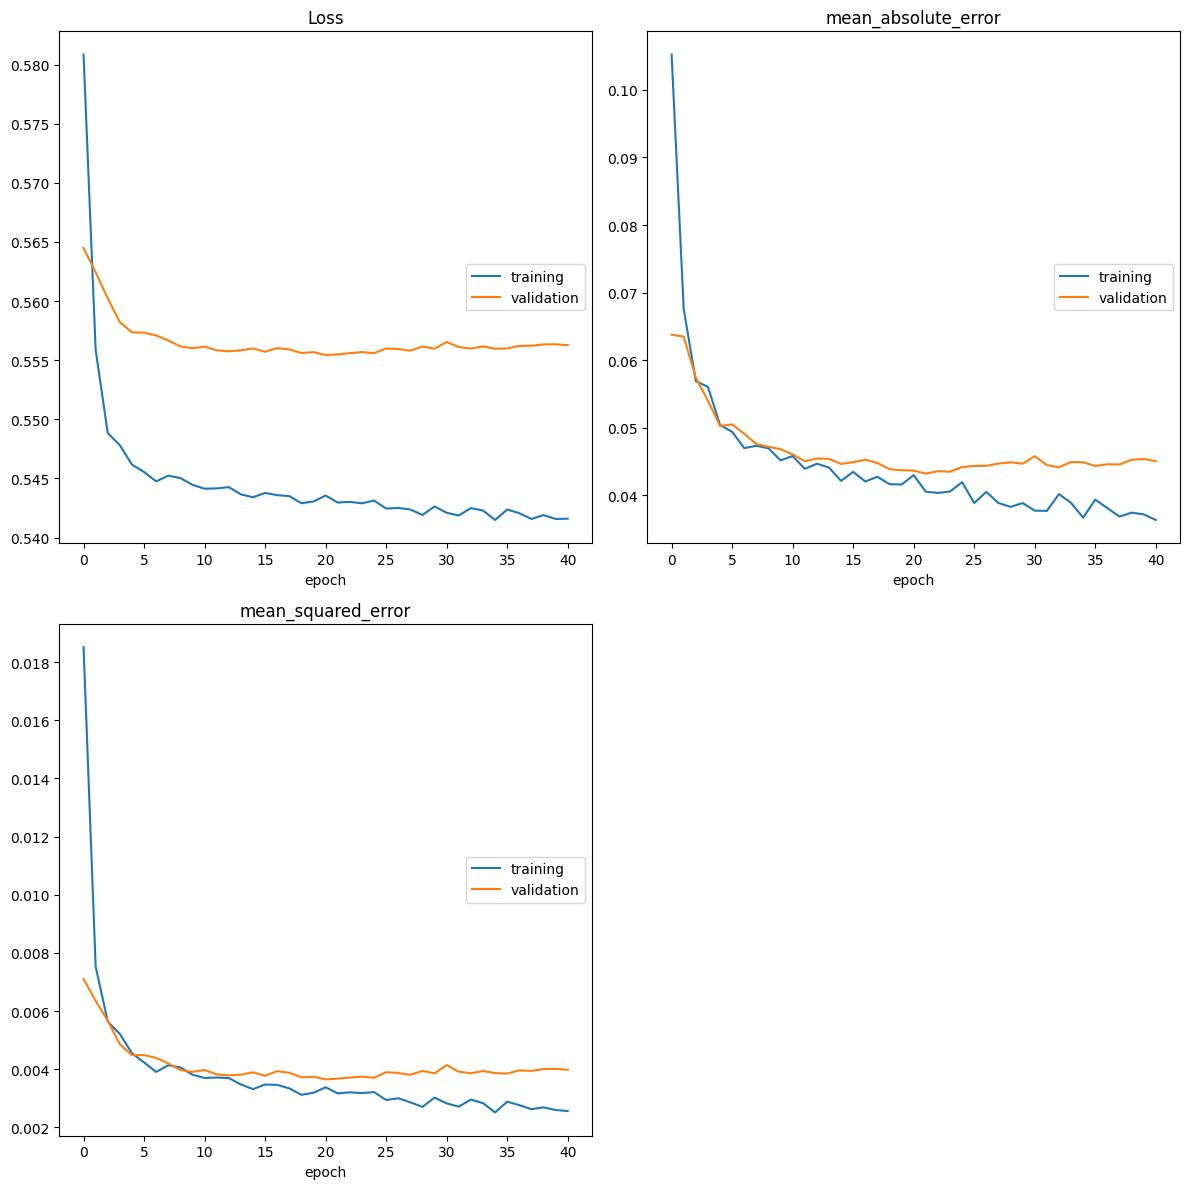

Loss
	training         	 (min:    0.541, max:    0.581, cur:    0.542)
	validation       	 (min:    0.555, max:    0.564, cur:    0.556)
mean_absolute_error
	training         	 (min:    0.036, max:    0.105, cur:    0.036)
	validation       	 (min:    0.043, max:    0.064, cur:    0.045)
mean_squared_error
	training         	 (min:    0.003, max:    0.019, cur:    0.003)
	validation       	 (min:    0.004, max:    0.007, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5462 - mean_absolute_error: 0.0372 - mean_squared_error: 0.0027 - val_loss: 0.5563 - val_mean_absolute_error: 0.0451 - val_mean_squared_error: 0.0040


In [16]:
# Se define el 'Early Stopping' para tdetener el entrenamiento cuando el modelo no presenta mejoras en la pérdida del conjunto de datos de validación.
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

# Se define la función de pérdida 'binary_crossentropy', y se realiza el entrenamiento del modelo.
neuralNetwork_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mean_squared_error', 'mean_absolute_error'])
neuralNetwork_3.fit(xTrain_Scaled, yTrain, epochs = 300, validation_data = (xTest_Scaled, yTest), callbacks = [PlotLossesKeras(), earlyStopping])

## Procedimiento

---

1. Se construye una **Red Neuronal de tres capas** con los parámetros:
   - **Capa 1**: `Dense(units = 256, input_shape = 7, activation = 'relu')`.
   - **Capa 2**: `Dense(units = 128, input_shape = 256, activation = 'relu')`.
   - **Capa 3**: `Dense(units = 1, input_shape = 128, activation = 'sigmoid')`.

2. Después de la creación de cada capa oculta, **se definió un Dropout del 20% para la primera capa y del 10% para la segunda**. Estos valores fueron seleccionados tras realizar distintas iteraciones variando el valor de Dropout, e identificar que **dichos porcentajes ofrecían aproximadamente el mejor desempeño del modelo (aunque los valores de las métricas no variaban significativamente cuando el Droput se encontraba en el rango entre 10% a 30%)**. Aplicar Dropout permite que el modelo no presente sobre-ajuste al *"apagar"* neuronas de manera aleatoria, lo cual evita que la Red Neuronal aprenda patrones demasiado específicos de los datos de entrenamiento.

3. Se imprime el resumen de la arquitectura del modelo, incluyendo el tipo de capa, así como la cantidad de parámetros (pesos y sesgos).

4. Se compila el modelo con los siguientes parámetros:
   - Optimizador: `adam`.
   - Función de pérdida: `binary_crossentropy`.
   - Métricas: `mean_squared_error` y `mean_absolute_error`.

5. Adicionalmente, **se definió un *EarlyStopping* utilizando como métrica de evaluación la función de pérdida, y considerando un valor de `patience = 20`**. Este valor determina la cantidad de épocas que deben transcurrir sin mejoras en la función de pérdida para activar la condición de parada anticipada del entrenamiento.

6. **Se entrena el modelo a través de 300 iteraciones (épocas)** utilizando `xTrain_Scaled`. Se visualiza en tiempo real la función de pérdida, el MSE y el MAE del conjunto de validación `xTest_Scaled`.

## Análisis

---

1. **Optimizador y función de pérdida**. Al igual que en los puntos anteriores, se utiliza como método de optimización **Adam** y como función de pérdida **Entropía Cruzada Binaria**. Su justificación completa se encuentra en el análisis del modelo anterior.
   - Se mantiene el uso de `binary_crossentropy` debido a su eficacia en problemas donde se estiman probabilidades entre 0 y 1.
   - Se opta nuevamente por el optimizador `adam` (Adaptive Moment Estimation) en lugar de `SGD`, por su rápida convergencia y capacidad para adaptarse a diversas funciones del error.

2. **Funciones de activación**. Se emplea **ReLU** como función de activación en las **capas ocultas**, y **Sigmoide** en la **capa de salida**.
   - Para esta Red Neuronal de tres capas, **no se observaron diferencias significativas en el desempeño al utilizar distintas funciones de activación como *Softmax*, *ReLU* y *Sigmoide* en las capas ocultas**. Por tanto, y con el objetivo de mantener la consistencia en la comparabilidad entre modelos, **se mantiene *ReLU* como función de activación en dichas capas**.
   - La función **Sigmoide** en la capa de salida se mantiene por su capacidad de acotar la salida al rango [0, 1], adecuado para representar probabilidades.

3. **Número de iteraciones (épocas)**. Al igual que en los modelos anteriores, **se opta por un número relativamente alto de épocas para realizar un seguimiento del comportamiento del modelo y detectar posibles señales de sobre-ajuste**. Se observó una convergencia temprana en la función de pérdida tanto en los datos de entrenamiento como en los de validación. **Esto también se validó a través del Early Stopping, ya que el modelo se detuvo poco después de alcanzar las 40 épocas**.

4. Respecto al número de neuronas, se utilizaron 256 unidades en la primera capa oculta y 128 en la segunda capa. Añadir más capas no mostró un desempeño superior, pero sí incrementaba el tiempo de ejecución del modelo.

5. Además de la función de pérdida (Entropía Cruzada Binaria), **se hizo seguimiento al MAE y al MSE, observando un comportamiento coherente con el proceso de aprendizaje del modelo**.

6. Al observar las gráficas de la función de pérdida, MAE y MSE, se nota que al **incluir tres capas en el modelo, la curva de entrenamiento muestra un rápido descenso en comparación con los modelos entrenados con menos capas durante las primeras épocas**. Además, al tener Early Stopping, es posible observar con mayor detalle la ligera variabilidad en la curva de pérdida de los datos de entrenamiento, mientras que **la curva de validación presenta menos saltos a medida que aumentan las épocas**. Esto puede ser un buen indicio de la estabilidad del modelo, lo cual podría explicarse en parte por la estrategia de Dropout implementada después de agregar cada capa a la red.

7. **Resultados finales**. Luego del entrenamiento, los **mejores resultados obtenidos sobre los datos de validación** fueron los siguientes:
   - **Función de pérdida**: `0.555`
   - **Mean Absolute Error (MAE)**: `0.043`
   - **Mean Squared Error (MSE)**: `0.004`

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

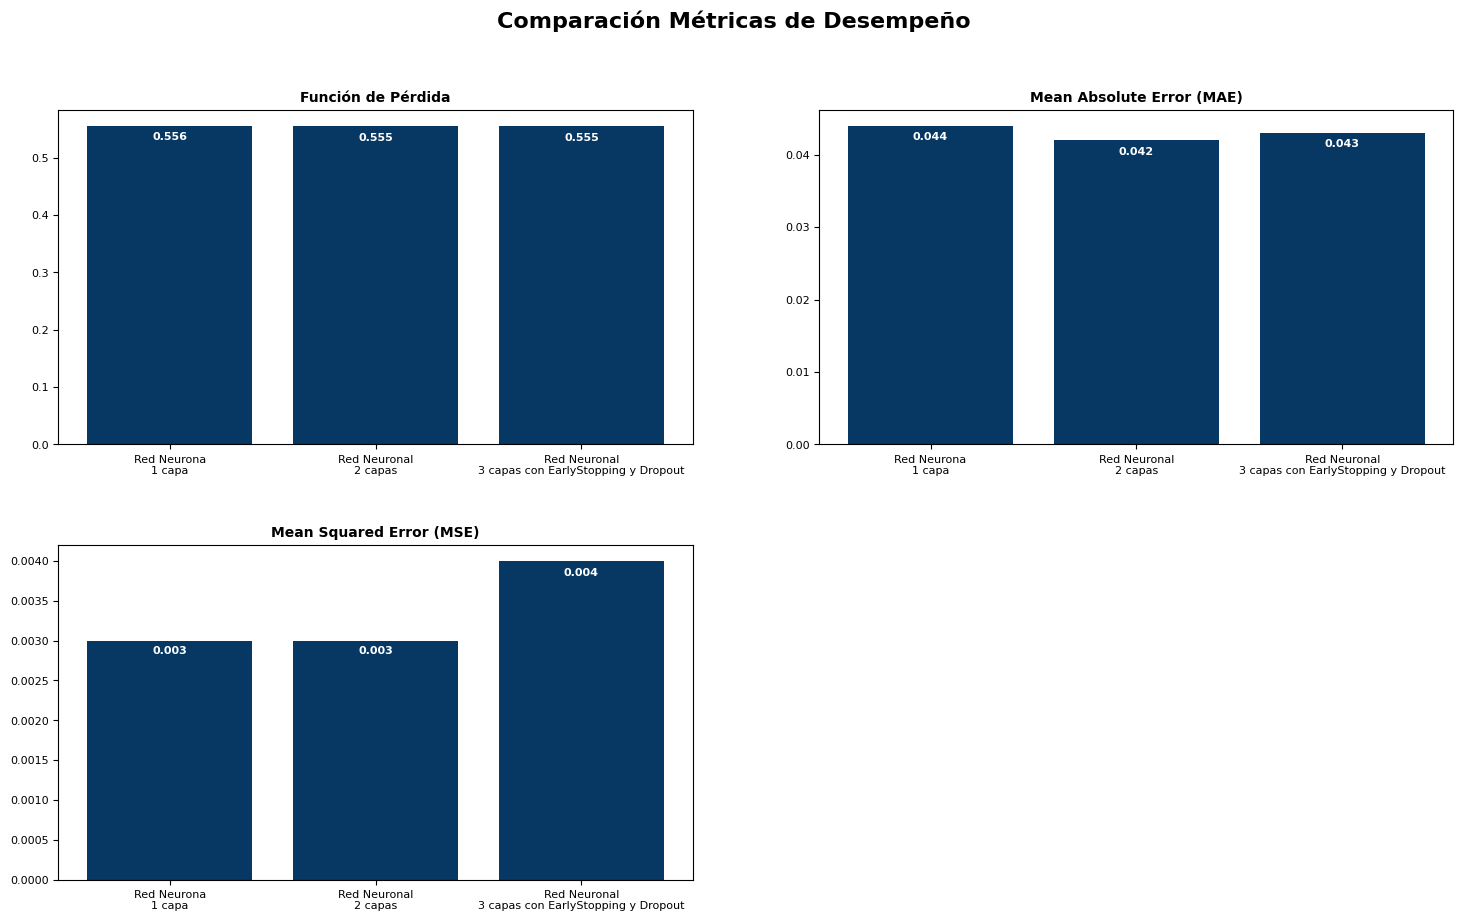

In [51]:
# A continuación se realiza una gráfica comparativa en donde se podrá observar el desempeño de los modelos evaluados previamente.

smoteLevels = ['Red Neurona\n1 capa', 'Red Neuronal\n2 capas', 'Red Neuronal\n3 capas con EarlyStopping y Dropout']
loss = [0.556, 0.555, 0.555]
mae = [0.044, 0.042, 0.043]
mse = [0.003, 0.003, 0.004]


fig, axes = plt.subplots(2, 2, figsize = (18, 10))
fig.suptitle('Comparación Métricas de Desempeño', fontsize = 16, fontweight = 'bold')

metricas = ['Función de Pérdida', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)']
valores = [loss, mae, mse]

for ax, metric, valores_metric in zip(axes.flat, metricas, valores):
    bars = ax.bar(smoteLevels, valores_metric, color = '#073763')

    for bar in bars:
        ax.annotate(f'{bar.get_height():.3f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height() - (0.02 * bar.get_height())),
                    ha = 'center', va = 'top', fontsize = 8, color = 'white', fontweight = 'bold')

    ax.set_title(metric, fontsize = 10, fontweight = 'bold')

    ax.tick_params(axis = 'x', labelsize = 8)
    ax.tick_params(axis = 'y', labelsize = 8)

# Se inhabilita el último gráfico
axes[1][1].axis('off')

plt.subplots_adjust(hspace = 0.3)
plt.show()

## Análisis  
---

El modelo que presenta mejor desempeño general al comparar las métricas del conjunto de evaluación (función de pérdida, MAE y MSE) es la **Red Neuronal con 2 capas, sin implementar *EarlyStopping* ni *Dropout***.

1. **Función de pérdida**. En cuanto a la función de pérdida, no se observan diferencias significativas entre los modelos, ya que todos presentan valores iguales o muy similares, alrededor de **0.555**.

2. **Mean Absolute Error (MAE)**. Al igual que con la función de pérdida, el MAE no muestra variaciones importantes entre modelos. Sin embargo, el que presenta el mejor resultado es la **Red Neuronal con 2 capas** (sin ajustes adicionales como *EarlyStopping* o *Dropout*), seguida por la **Red Neuronal de 3 capas, EarlyStopping y Dropout**.

3. **Mean Squared Error (MSE)**. Las Redes Neuronales con 1 y 2 capas muestran rendimientos prácticamente idénticos (MSE de **0.003**). En cambio, la Red Neuronal con 3 capas (con *EarlyStopping* y *Dropout*) tiene el peor desempeño, con un MSE de **0.004**. Este resultado es interesante, ya que no es consistente con métricas como el MAE. Puede deberse a que el MSE no es la métrica más adecuada para penalizar errores sobre valores probabilísticos. Otra posible razón es que el uso de ***EarlyStopping* haya evitado que el modelo continúe mejorando sobre el conjunto de validación**.

---

### Ventajas del mejor modelo: Red Neuronal con 2 capas

- Como se mencionó anteriormente, **la Red Neuronal con dos capas muestra el mejor desempeño general**.
- Una de sus ventajas es que ofrece **mayor flexibilidad en las predicciones**, en comparación con la Red Neuronal de una sola capa (la cual, en esencia, se comporta como una regresión logística al utilizar la función de activación *sigmoide*). Esta arquitectura agrega una capa adicional y permite un modelado más complejo, **usando además funciones de activación como *ReLU* en las capas intermedias**.
- Al no añadir más capas, **se mantiene un equilibrio adecuado entre tiempo de ejecución y desempeño**, lo que permite usar un número alto de épocas para evaluar la evolución de las curvas de pérdida en un tiempo razonable.
- Además, **el uso de métodos de optimización adaptativos como *Adam* ayudó significativamente a reducir el tiempo de ejecución** y a mejorar el desempeño durante el ajuste de parámetros.

---

### Desventajas del peor modelo: Red Neuronal con 1 capa

> *Nota*: Aunque el MSE del modelo de Red Neuronal con 3 capas parece aquel de peor desempeño, no se le da tanto peso a esta métrica en problemas de predicción probabilística, debido a las limitaciones ya explicadas anteriormente.

- Una de las **principales desventajas de una Red Neuronal con una sola capa es su baja flexibilidad en el modelado**. En esencia, si se utiliza una función de activación *sigmoide* en la capa de salida, se está ajustando una **Regresión Logística**.
- Debido a su simplicidad, este tipo de red puede tener problemas de *under-fitting*, al no capturar patrones importantes en los datos.
- Estas desventajas se aplican de forma general a este tipo de redes. Sin embargo, en este caso particular, la Red Neuronal de una sola capa logró resultados bastante competitivos en comparación con los demás modelos, lo que indica que **una red más compleja (más capas o neuronas) no siempre garantiza un mejor desempeño predictivo**.